# gradients
large-scale manifold

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
approach = 'pca'

In [ ]:
RAND = 0    # random state

**if you don't apply cosine kernel while making affinity mat, you get way skewed gradient values.**

In [17]:
# this is computed based on `baseline`
ref_cmat = pd.read_csv('data/cmat/ref_mean.csv').to_numpy()

In [18]:
from brainspace.gradient import GradientMaps

In [23]:
import seaborn
from matplotlib import pyplot as plt

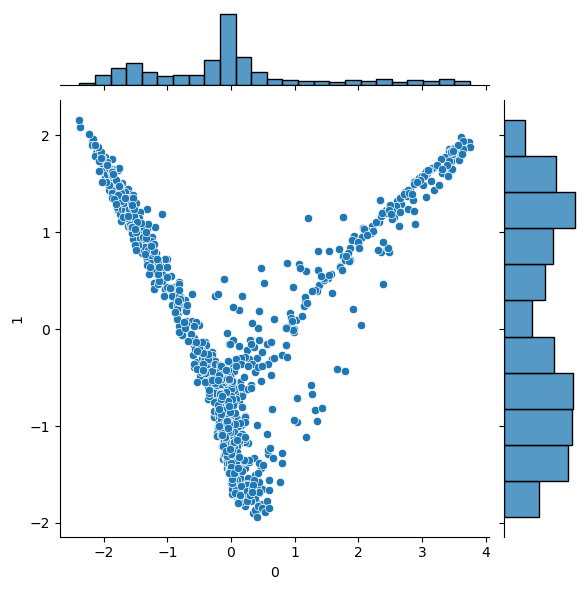

In [24]:
gref = GradientMaps(random_state=RAND, approach=approach, kernel='cosine')
# kernel needed for centered mats
gref.fit(ref_cmat)
seaborn.jointplot(data=pd.DataFrame(gref.gradients_), x=0, y=1)
plt.show()

In [27]:
def cmat_cnt(subject, epoch): return pd.read_csv('data/cmat/cnt/cnt_'+str(subject)+'_'+epoch+'.csv').to_numpy()

In [30]:
EPOCHS = ['baseline', 'early', 'late']
EPOCH_REF = 'baseline'

In [31]:
subjects = pd.read_csv('data/subjects.csv')

In [ ]:
g = GradientMaps(random_state=RAND, approach=approach, alignment='procrustes', kernel='cosine')
g.fit([cmat_cnt(s, e) for e in EPOCHS for s in subjects.int_id], reference=gref.gradients_)
np.stack(g.aligned_).shape

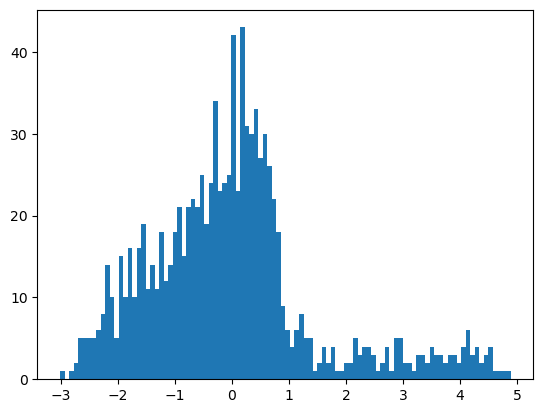

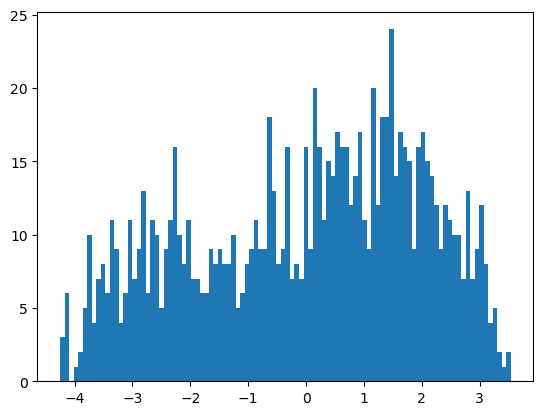

In [36]:
plt.hist(g.aligned_[0][:, 0], bins=100) # grad1
plt.show()
plt.hist(g.aligned_[0][:, 1], bins=100) # grad2
plt.show()

# make dataframe

In [139]:
# important: this is how the g.aligned_ list is organized
S = [1,2]
l = [(s, e) for e in EPOCHS for s in S]
print(l)
l[EPOCHS.index('late') * len(S) + S.index(2)]   # selects element for s=2, e='late'

[(1, 'baseline'), (2, 'baseline'), (1, 'early'), (2, 'early'), (1, 'late'), (2, 'late')]


(2, 'late')

In [328]:
r = pd.read_csv('data/regions_sorted.csv')

In [329]:
S = subjects.int_id.to_list()

df = pd.concat([pd.DataFrame({'subject': s, 'epoch': e,
                              'region': r['region'], '7net': r['7net'], '17net': r['17net'],
                              'g1': g.aligned_[EPOCHS.index(e) * len(S) + S.index(s)][:, 0],
                              'g2': g.aligned_[EPOCHS.index(e) * len(S) + S.index(s)][:, 1],
                              'g3': g.aligned_[EPOCHS.index(e) * len(S) + S.index(s)][:, 2],
                              'g4': g.aligned_[EPOCHS.index(e) * len(S) + S.index(s)][:, 3], })
                for e in EPOCHS for s in S], axis=0).reset_index(drop=True)

In [330]:
df

,subject,epoch,region,7net,17net,g1,g2,g3,g4
0,1,baseline,7Networks_LH_Vis_1,Vis,DorsAttnA,0.516958,-0.186538,1.501042,-0.668984
1,1,baseline,7Networks_LH_Vis_2,Vis,VisCent,0.636391,1.407541,0.977047,-0.758676
2,1,baseline,7Networks_LH_Vis_3,Vis,DorsAttnA,0.396966,0.630318,1.806822,0.007569
3,1,baseline,7Networks_LH_Vis_4,Vis,VisCent,2.380421,2.049884,0.085447,-0.858037
4,1,baseline,7Networks_LH_Vis_5,Vis,DefaultC,0.408135,0.698659,0.977117,0.278002
...,...,...,...,...,...,...,...,...,...
109291,46,late,Right Putamen,Striatum,StriatumRight,-0.861413,-0.664291,-0.450307,-1.694324
109292,46,late,Right Pallidum,Striatum,StriatumRight,-0.530126,-0.774942,-0.468807,-1.149747
109293,46,late,Right Hippocampus,Striatum,StriatumRight,-0.938860,-0.247830,-1.223909,-1.464685
109294,46,late,Right Amygdala,Striatum,StriatumRight,-1.114832,-0.355354,-1.374354,-1.242685


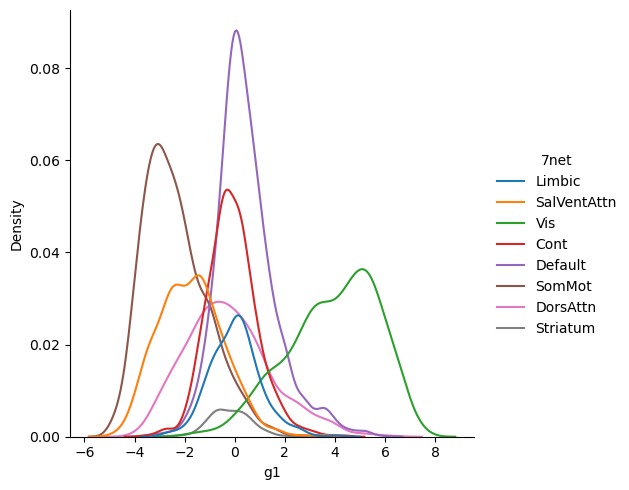

In [274]:
seaborn.displot(df.sample(10_000), x='g1', hue='7net', kind='kde')
plt.show()

In [ ]:
# this is the 3d plot. it would mess up the notebook if run
# fig = px.scatter_3d(df.sample(1000), x='g1', y='g2', z='g3', color='label', opacity=.4)
# fig.update_traces(marker_size=3)
# fig.show()

eccentricity
the Euclidean distance from the manifold center.
$Ecc = \sqrt{\sum_{\substack{i=1}}^4 G_i^2}$

In [331]:
df['ecc'] = df.apply(lambda r: np.sqrt(np.sum(g**2 for g in r[-4:])), axis=1)

/var/folders/2q/y6tqndfj1yqfc7hcdp99tz_00000gn/T/ipykernel_36853/4172976509.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  df['ecc'] = df.apply(lambda r: np.sqrt(np.sum(g**2 for g in r[-4:])), axis=1)


In [332]:
df

,subject,epoch,region,7net,17net,g1,g2,g3,g4,ecc
0,1,baseline,7Networks_LH_Vis_1,Vis,DorsAttnA,0.516958,-0.186538,1.501042,-0.668984,1.732833
1,1,baseline,7Networks_LH_Vis_2,Vis,VisCent,0.636391,1.407541,0.977047,-0.758676,1.978984
2,1,baseline,7Networks_LH_Vis_3,Vis,DorsAttnA,0.396966,0.630318,1.806822,0.007569,1.954366
3,1,baseline,7Networks_LH_Vis_4,Vis,VisCent,2.380421,2.049884,0.085447,-0.858037,3.257601
4,1,baseline,7Networks_LH_Vis_5,Vis,DefaultC,0.408135,0.698659,0.977117,0.278002,1.298746
...,...,...,...,...,...,...,...,...,...,...
109291,46,late,Right Putamen,Striatum,StriatumRight,-0.861413,-0.664291,-0.450307,-1.694324,2.063208
109292,46,late,Right Pallidum,Striatum,StriatumRight,-0.530126,-0.774942,-0.468807,-1.149747,1.556685
109293,46,late,Right Hippocampus,Striatum,StriatumRight,-0.938860,-0.247830,-1.223909,-1.464685,2.141526
109294,46,late,Right Amygdala,Striatum,StriatumRight,-1.114832,-0.355354,-1.374354,-1.242685,2.191402


In [333]:
# df.to_csv('data/gradients.csv', index=False)

average

In [289]:
df_mean = df.groupby(['region', 'epoch', '7net', '17net']).agg('mean').drop('subject', axis=1).reset_index()
df_mean

,region,epoch,7net,17net,g1,g2,g3,g4,ecc
0,7Networks_LH_Cont_Cing_1,baseline,Cont,SalVentAttnB,-1.568082,-0.292681,-0.214813,-0.957925,2.360363
1,7Networks_LH_Cont_Cing_1,early,Cont,SalVentAttnB,-1.635978,0.037227,-0.567208,-0.542964,2.458661
2,7Networks_LH_Cont_Cing_1,late,Cont,SalVentAttnB,-1.657511,0.038653,-0.614793,-0.953411,2.567954
3,7Networks_LH_Cont_Cing_2,baseline,Cont,ContC,0.483634,-1.805169,-0.963203,1.607929,2.988855
4,7Networks_LH_Cont_Cing_2,early,Cont,ContC,0.398380,-1.651304,-1.331622,1.320727,2.797557
...,...,...,...,...,...,...,...,...,...
3031,Right_Putamen,early,Striatum,StriatumRight,-0.689255,-0.110267,-0.145195,-1.035629,1.633520
3032,Right_Putamen,late,Striatum,StriatumRight,-0.939216,-0.178111,-0.185569,-1.193092,1.864229
3033,Right_Thalamus,baseline,Striatum,StriatumRight,-0.216845,-0.441681,-0.152570,-0.476143,1.351675
3034,Right_Thalamus,early,Striatum,StriatumRight,-0.242206,-0.229092,-0.132197,-0.900247,1.520770


In [292]:
# caution: `groupby` changes regions' ordering. This doesn't start with `LH_Vis`
df_mean = df_mean.set_index('region').loc[pd.Series(r['r'])].reset_index()
df_mean.head()

,region,epoch,7net,17net,g1,g2,g3,g4,ecc
0,7Networks_LH_Vis_1,baseline,Vis,DorsAttnA,0.714618,0.179757,0.540071,-0.233079,1.968233
1,7Networks_LH_Vis_1,early,Vis,DorsAttnA,0.682796,-0.116861,0.256490,-0.536388,1.841965
2,7Networks_LH_Vis_1,late,Vis,DorsAttnA,0.278858,-0.245021,-0.090645,-0.324249,1.682773
3,7Networks_LH_Vis_2,baseline,Vis,VisCent,1.241687,1.268604,0.866375,-0.177822,2.693591
4,7Networks_LH_Vis_2,early,Vis,VisCent,1.140651,1.299236,0.771234,-0.147166,2.494169


# brain plot

In [294]:
import nibabel
from brainspace.datasets import load_conte69
from brainspace.utils.parcellation import map_to_labels
from surfplot import Plot

In [295]:
fname = '/Users/qasem/PycharmProjects/gradients-rl-task/data/Schaefer2018_1000Parcels_7Networks_order.dlabel.nii'
l_hemi, r_hemi = load_conte69()
vertices = nibabel.load(fname).get_fdata()[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


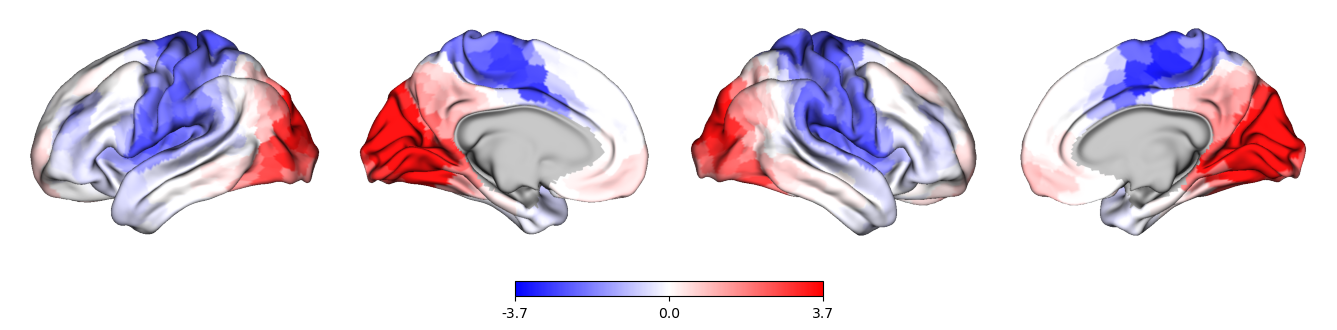

In [296]:
data = df_mean[df_mean.epoch=='baseline'].reset_index()['g1']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='row', size=(1600, 300))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-3.7, 3.7))
_ = p.build()

<AxesSubplot: >

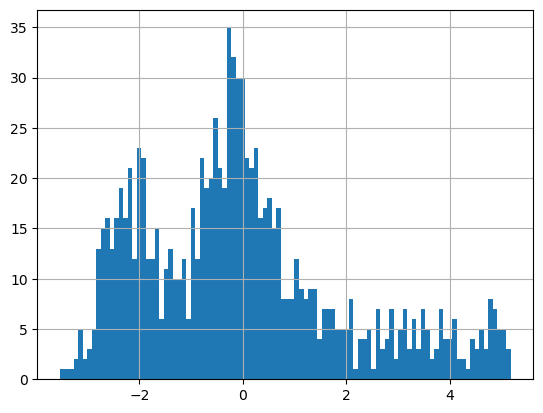

In [297]:
df_mean.loc[df_mean.epoch=='baseline', 'g1'].hist(bins=100)

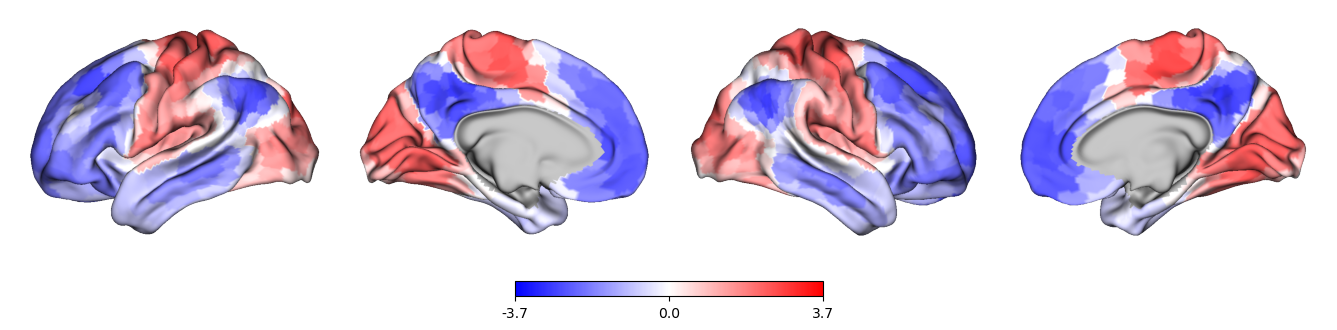

In [298]:
data = df_mean[df_mean.epoch=='baseline'].reset_index()['g2']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='row', size=(1600, 300))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-3.7, 3.7))
_ = p.build()

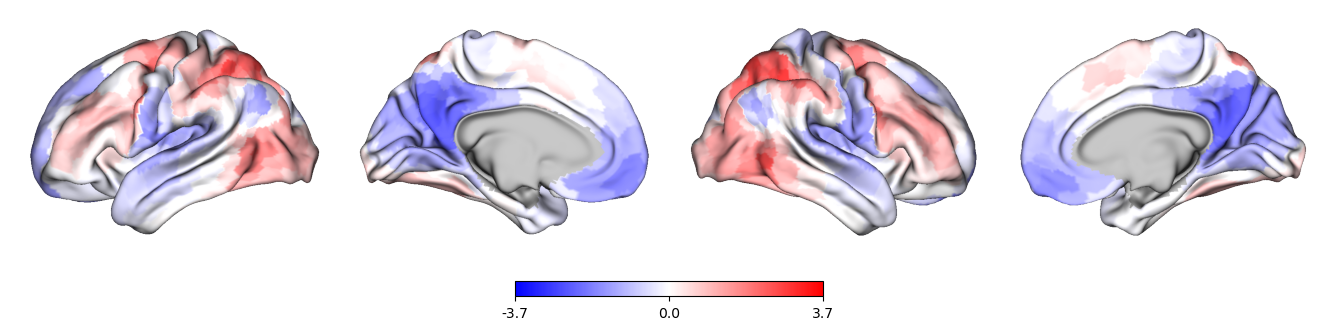

In [299]:
data = df_mean[df_mean.epoch=='baseline'].reset_index()['g3']
data = map_to_labels(data, vertices, mask=(vertices != 0))
p = Plot(surf_lh=l_hemi, surf_rh=r_hemi, layout='row', size=(1600, 300))
p.add_layer(data, cbar=True, cmap='bwr', color_range=(-3.7, 3.7))
_ = p.build()